In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba
from wordcloud import WordCloud
from imageio import imread
import warnings

sns.set(style="darkgrid")
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False
warnings.filterwarnings("ignore")

### 数据读取

In [2]:
#path这里修改路径，就是你文件放的位置
path='D:/python_workpace/Crawler/淘宝数据爬取/'
#df = pd.read_csv(path+"笔记本电脑.csv", engine='python', encoding='utf-8-sig', header=None)
df = pd.read_csv(path+"口红.csv", engine='python', encoding='utf-8-sig', header=None)
df.columns = ["描述信息", "价格", "付款人数", "旗舰店", "发货地址"]
df.head(18)

,描述信息,价格,付款人数,旗舰店,发货地址
0,【屈臣氏】GLO＆RAY光芮唇爱唇膏原色/微光滋润显色不易脱色口红,151.0,1人付款,屈臣氏官方旗舰店,江苏 苏州
1,爱茉莉Hera/赫妍魅感小辣椒丰盈哑光口红 自然显色雾感丝滑唇膏,230.0,41人付款,爱茉莉官方海外旗舰店,韩国
2,李佳琦推荐空气唇釉丝绒哑光雾面口红滋润保湿唇彩小众女学生平价,14.9,331人付款,欧伊俪旗舰店,广东 深圳
3,李佳琦推荐变色唇膏保湿滋润女小众口红不掉色不沾杯补水大牌正品,9.9,244人付款,欧伊俪旗舰店,广东 广州
4,阿玛尼口红405番茄红唇釉红黑管哑光200 415 500 501 524 400礼盒,189.0,3616人付款,mysnku韩式,广东 深圳
5,正品Chanel香奈儿口红滋润保湿丝绒炫亮魅力唇膏43 46 57 58 152,190.0,3754人付款,b百分百d,上海
6,正品Chanel/香奈儿口红炫亮唇膏3.5g丝绒保湿滋润 42#43#136#色号,190.0,2579人付款,七梵米亚,上海
7,Chanel香奈儿新品山茶花限量口红丝绒黑金魅力唇膏357/837/857,208.0,2246人付款,m_少根筋姐姐,上海
8,正品Chanel/香奈儿口红丝绒炫亮保湿魅力唇膏42#43#56#57#58#172#,190.0,2484人付款,时尚潮流前线0008,上海
9,Chanel/香奈儿口红正品58号色丝绒炫亮魅力唇膏42#43#56#57#172#,190.0,1306人付款,杨鹏飞网银yl,上海


### 数据去重：我们认为“描述信息”和“价格”相同的记录，都是相同的记录。

In [4]:
# 去重之前的记录数
print("去重之前的记录数",df.shape)
# 记录去重
df.drop_duplicates(subset=["描述信息","价格"],inplace=True)
# 去重之后的记录数
print("去重之后的记录数",df.shape)

去重之前的记录数 (4277, 5)
去重之后的记录数 (4277, 5)


In [5]:
#删去所有含有缺失值的行
df=df.dropna() # 默认是按行删除 即axis=0

In [6]:
df=pd.DataFrame(df)
print(df.sort_values(by='价格').head(10))

                                        描述信息   价格     付款人数      旗舰店   发货地址
639            持久保湿滋润防水豆沙色枫叶橘不沾杯不掉色唇膏学生女大众口红  2.9   899人付款  天天特卖工厂店  浙江 杭州
811            柔雾丝绒唇釉持久保湿唇彩唇蜜滋润口红雾面玻璃唇联名水光补水  3.9   845人付款  天天特卖工厂店  浙江 杭州
795            唇釉女学生平价雾面染唇液唇蜜唇彩口红显白不易哑光少女学生用  3.9   298人付款  天天特卖工厂店  浙江 杭州
797              优雅丝绒滋润口红易上色补水保湿学生款唇膏不易脱色易上色  4.9    61人付款  天天特卖工厂店  浙江 杭州
636   Colorina Pro-Artist方管口红哑光雾面保湿滋润口红姨妈番茄色  4.9  1079人付款  天天特卖工厂店  浙江 杭州
856                【口红笔+唇刷】哑光口红唇膏丝绒雾面持久显色豆沙色  5.2    88人付款  天天特卖工厂店  浙江 杭州
766            子弹头口红哑光女学生款不掉色不沾杯持久保湿滋润丝绒雾面防水  5.8   348人付款  天天特卖工厂店  浙江 杭州
2177          雅邦持久保湿口红哑光唇膏防水不掉色女学生款平价豆沙色国货正品  5.8  2751人付款     遥远zx  陕西 西安
687            保湿补水润唇膏滋润男女学生无色口红打底孕妇护唇膏哑光不掉色  5.9  2235人付款  天天特卖工厂店  浙江 杭州
903            黄金烟管口红细管美妆易小众品牌唇膏学生款蜜桃哑光枫叶不掉色  5.9   162人付款  天天特卖工厂店  浙江 杭州


### 付款人数字段的处理

In [7]:
df["付款人数"].isnull().sum()
df=df.reset_index(drop = True)#删去某列后index是不变的，得重新排序

In [8]:
df["付款人数"].head(18)

0         1人付款
1        41人付款
2       331人付款
3       244人付款
4      3616人付款
5      3754人付款
6      2579人付款
7      2246人付款
8      2484人付款
9      1306人付款
10    6.0万+人付款
11    2.0万+人付款
12     1404人付款
13     2062人付款
14     1078人付款
15    5500+人付款
16     1589人付款
17     1203人付款
Name: 付款人数, dtype: object

In [9]:
df["付款人数"]=pd.DataFrame(df["付款人数"].astype(str))

In [10]:
for j in range(len(df["付款人数"])):
    test1=df["付款人数"][j]
    #print(test1)
    if test1.find('万')!=-1:
        df["付款人数"][j]=float(re.findall(r'\d+(?:\.\d+)?', test1)[0])*10000
    else:
        df["付款人数"][j]=float(re.findall(r'\d+(?:\.\d+)?', test1)[0])

    

In [11]:
df["付款人数"]

0          1
1         41
2        331
3        244
4       3616
        ... 
4237      17
4238     485
4239      44
4240      20
4241       7
Name: 付款人数, Length: 4242, dtype: object

### 发货地址的处理

In [12]:
df['发货地址']=pd.DataFrame(df['发货地址'])
df['发货地址']

0       江苏 苏州
1          韩国
2       广东 深圳
3       广东 广州
4       广东 深圳
        ...  
4237    福建 福州
4238    浙江 杭州
4239    湖北 武汉
4240       北京
4241    浙江 杭州
Name: 发货地址, Length: 4242, dtype: object

In [19]:
df["发货地址"] =pd.DataFrame(df["发货地址"].astype(str))
for i in range(len(df["发货地址"])):
    pattern=r"[ ]"   # 定义分隔符   只要出现?或者$就将字符串进行分割
    kongge=0
    x=df["发货地址"][i]
    for j in range(len((x))):
        if x[j]==' ':
            kongge=1
    if kongge==1:
        result=re.split(pattern,x)
        df["发货地址"][i]=result[1]
df["发货地址"].value_counts().head(10)

上海    922
深圳    502
广州    393
杭州    383
北京    221
苏州    149
青岛     98
南京     91
宁波     81
金华     75
Name: 发货地址, dtype: int64

In [14]:

'''
def func2(x):
    pattern=r"[ ]"   # 定义分隔符   只要出现?或者$就将字符串进行分割
    kongge=0
    for i in range(len(x)):
        if x[i]==' ':
            kongge=1
    if kongge==1:
        result=re.split(pattern,x)
        return result[1]
    else:
        return x

df["发货地址"] = df["发货地址"].fillna({"发货地址":"无"})
df["发货地址"] = df["发货地址"].apply(func2)
df.head(19)
'''
df

,描述信息,价格,付款人数,旗舰店,发货地址
0,【屈臣氏】GLO＆RAY光芮唇爱唇膏原色/微光滋润显色不易脱色口红,151.0,1,屈臣氏官方旗舰店,苏州
1,爱茉莉Hera/赫妍魅感小辣椒丰盈哑光口红 自然显色雾感丝滑唇膏,230.0,41,爱茉莉官方海外旗舰店,韩国
2,李佳琦推荐空气唇釉丝绒哑光雾面口红滋润保湿唇彩小众女学生平价,14.9,331,欧伊俪旗舰店,深圳
3,李佳琦推荐变色唇膏保湿滋润女小众口红不掉色不沾杯补水大牌正品,9.9,244,欧伊俪旗舰店,广州
4,阿玛尼口红405番茄红唇釉红黑管哑光200 415 500 501 524 400礼盒,189.0,3616,mysnku韩式,深圳
...,...,...,...,...,...
4237,免税 雅诗兰黛口红丝绒哑光唇膏持久保湿枫叶红 333/420豆沙,169.0,17,4wei22,福州
4238,MAC/魅可子弹头口红唇膏小辣椒色/俄罗斯红1.8g中样,75.0,485,承天之佑151011,杭州
4239,MAC魅可316脏橘色423牛血色chili小辣椒【口红试色瑕疵碰头划痕】,78.0,44,年华似水198901,武汉
4240,mac口红marrakesh646新色649chil小辣椒牛血色泫雅色 923 水蜜桃,109.0,20,kun0536,北京


In [16]:
tar_cpu=['阿玛尼','香奈儿','迪奥','魅可','纪梵希','圣罗兰','古驰','兰蔻','卡姿兰','完美日记','曼秀雷敦','欧莱雅','珂莱欧','资生堂','屈臣氏','爱马仕','CL']
#tar_cpu = ['联想','惠普','酷睿','苹果','三星','华硕','索尼','宏碁','戴尔','海尔','长城','海尔','神舟','清华同方','方正','明基']
tar_cpu = np.array(tar_cpu)
def rename(x):
    index = [i in x for i in tar_cpu]
    if sum(index) > 0:
        return tar_cpu[index][0]
    else:
        return "牌子不详"
df["口红品牌"] = df["描述信息"].apply(rename)
df.head(10)

,描述信息,价格,付款人数,旗舰店,发货地址,口红品牌
0,【屈臣氏】GLO＆RAY光芮唇爱唇膏原色/微光滋润显色不易脱色口红,151.0,1,屈臣氏官方旗舰店,苏州,屈臣氏
1,爱茉莉Hera/赫妍魅感小辣椒丰盈哑光口红 自然显色雾感丝滑唇膏,230.0,41,爱茉莉官方海外旗舰店,韩国,牌子不详
2,李佳琦推荐空气唇釉丝绒哑光雾面口红滋润保湿唇彩小众女学生平价,14.9,331,欧伊俪旗舰店,深圳,牌子不详
3,李佳琦推荐变色唇膏保湿滋润女小众口红不掉色不沾杯补水大牌正品,9.9,244,欧伊俪旗舰店,广州,牌子不详
4,阿玛尼口红405番茄红唇釉红黑管哑光200 415 500 501 524 400礼盒,189.0,3616,mysnku韩式,深圳,阿玛尼
5,正品Chanel香奈儿口红滋润保湿丝绒炫亮魅力唇膏43 46 57 58 152,190.0,3754,b百分百d,上海,香奈儿
6,正品Chanel/香奈儿口红炫亮唇膏3.5g丝绒保湿滋润 42#43#136#色号,190.0,2579,七梵米亚,上海,香奈儿
7,Chanel香奈儿新品山茶花限量口红丝绒黑金魅力唇膏357/837/857,208.0,2246,m_少根筋姐姐,上海,香奈儿
8,正品Chanel/香奈儿口红丝绒炫亮保湿魅力唇膏42#43#56#57#58#172#,190.0,2484,时尚潮流前线0008,上海,香奈儿
9,Chanel/香奈儿口红正品58号色丝绒炫亮魅力唇膏42#43#56#57#172#,190.0,1306,杨鹏飞网银yl,上海,香奈儿


In [17]:
# 不同电脑品牌的销量
x = df["口红品牌"].value_counts().reset_index()
#x = x.drop(df.index[1], axis=0)   # 注意这种用法
#x.index = np.arange(1,len(x)+1)
x

,index,口红品牌
0,牌子不详,2148
1,魅可,537
2,兰蔻,356
3,迪奥,259
4,卡姿兰,171
5,香奈儿,162
6,圣罗兰,140
7,阿玛尼,106
8,纪梵希,86
9,完美日记,56


### 描述性息字段的处理

In [22]:
#例子
#x = "【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商务轻薄便携粉色女生款"
#list(jieba.cut(x))
x=df['描述信息'][0]
list(jieba.cut(x))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\92116\AppData\Local\Temp\jieba.cache
Loading model cost 1.118 seconds.
Prefix dict has been built successfully.


['【',
 '屈臣氏',
 '】',
 'GLO',
 '＆',
 'RAY',
 '光芮唇',
 '爱',
 '唇膏',
 '原色',
 '/',
 '微光',
 '滋润',
 '显色',
 '不易',
 '脱色',
 '口红']

In [24]:
add_word=['阿玛尼','香奈儿','迪奥','魅可','纪梵希','圣罗兰','古驰','兰蔻','卡姿兰','完美日记','曼秀雷敦','欧莱雅','珂莱欧','资生堂','屈臣氏','爱马仕','CL']
#add_word = ['联想','惠普','酷睿','苹果','三星','华硕','索尼','宏碁','戴尔','海尔','长城','海尔','神舟','清华同方','方正','明基'] 
for i in add_word:
    jieba.add_word(i)
df["切分后的描述信息"] = df["描述信息"].apply(lambda x:jieba.lcut(x))
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址,口红品牌,切分后的描述信息
0,【屈臣氏】GLO＆RAY光芮唇爱唇膏原色/微光滋润显色不易脱色口红,151.0,1,屈臣氏官方旗舰店,苏州,屈臣氏,"[【, 屈臣氏, 】, GLO, ＆, RAY, 光芮唇, 爱, 唇膏, 原色, /, 微光..."
1,爱茉莉Hera/赫妍魅感小辣椒丰盈哑光口红 自然显色雾感丝滑唇膏,230.0,41,爱茉莉官方海外旗舰店,韩国,牌子不详,"[爱, 茉莉, Hera, /, 赫妍, 魅感, 小辣椒, 丰盈, 哑光, 口红, , 自..."
2,李佳琦推荐空气唇釉丝绒哑光雾面口红滋润保湿唇彩小众女学生平价,14.9,331,欧伊俪旗舰店,深圳,牌子不详,"[李佳琦, 推荐, 空气, 唇, 釉, 丝绒, 哑, 光雾, 面, 口红, 滋润, 保湿, ..."
3,李佳琦推荐变色唇膏保湿滋润女小众口红不掉色不沾杯补水大牌正品,9.9,244,欧伊俪旗舰店,广州,牌子不详,"[李佳琦, 推荐, 变色, 唇膏, 保湿, 滋润, 女小众, 口红, 不, 掉色, 不沾杯,..."
4,阿玛尼口红405番茄红唇釉红黑管哑光200 415 500 501 524 400礼盒,189.0,3616,mysnku韩式,深圳,阿玛尼,"[阿玛尼, 口红, 405, 番茄, 红唇, 釉红, 黑管, 哑光, 200, , 415..."


In [25]:
### 都去停用词
with open(path+"stoplist.txt", encoding="utf8") as f:
    stop = f.read()
stop = stop.split()
#stop = [" ","笔记本电脑"] + stop
stop = [" ","口红"] + stop
stop[:10]

[' ', '口红', '\ufeff', '说', '人', '元', 'hellip', '&', ',', '?']

In [26]:
df["切分后的描述信息"] = df["切分后的描述信息"].apply(lambda x: [i for i in x if i not in stop])
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址,口红品牌,切分后的描述信息
0,【屈臣氏】GLO＆RAY光芮唇爱唇膏原色/微光滋润显色不易脱色口红,151.0,1,屈臣氏官方旗舰店,苏州,屈臣氏,"[屈臣氏, GLO, RAY, 光芮唇, 爱, 唇膏, 原色, 微光, 滋润, 显色, 不易..."
1,爱茉莉Hera/赫妍魅感小辣椒丰盈哑光口红 自然显色雾感丝滑唇膏,230.0,41,爱茉莉官方海外旗舰店,韩国,牌子不详,"[爱, 茉莉, Hera, 赫妍, 魅感, 小辣椒, 丰盈, 哑光, 自然, 显色, 雾, ..."
2,李佳琦推荐空气唇釉丝绒哑光雾面口红滋润保湿唇彩小众女学生平价,14.9,331,欧伊俪旗舰店,深圳,牌子不详,"[李佳琦, 推荐, 空气, 唇, 釉, 丝绒, 哑, 光雾, 面, 滋润, 保湿, 唇彩, ..."
3,李佳琦推荐变色唇膏保湿滋润女小众口红不掉色不沾杯补水大牌正品,9.9,244,欧伊俪旗舰店,广州,牌子不详,"[李佳琦, 推荐, 变色, 唇膏, 保湿, 滋润, 女小众, 掉色, 不沾杯, 补水, 大牌..."
4,阿玛尼口红405番茄红唇釉红黑管哑光200 415 500 501 524 400礼盒,189.0,3616,mysnku韩式,深圳,阿玛尼,"[阿玛尼, 405, 番茄, 红唇, 釉红, 黑管, 哑光, 200, 415, 500, ..."


In [31]:
#计数出现词的个数
all_words = []
for i in df["切分后的描述信息"]:
    for j in i:
        all_words.extend(i)
word_count = pd.Series(all_words).value_counts()
print(word_count[:20])

唇膏     26065
哑光     15734
正品     14177
釉      11927
滋润     11320
丝绒     10172
色      10027
女       9661
唇       9621
学生      8925
保湿      8712
持久      8384
MAC     7525
魅可      6969
大牌      5485
款       5379
套装      5097
黑管      4857
雾面      4719
小辣椒     4614
dtype: int64


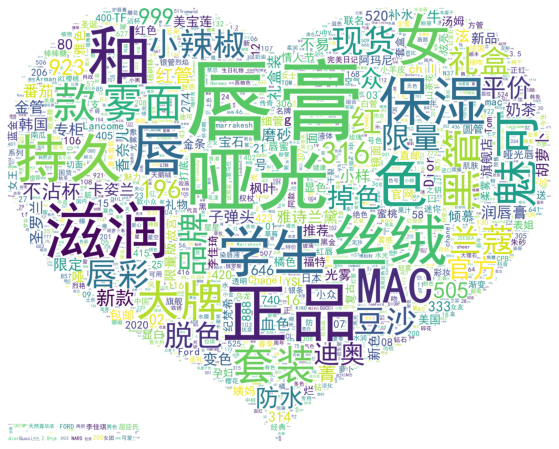

In [32]:
# 1、读取背景图片
back_picture = imread(path+"aixin.jpg")

# 2、设置词云参数
wc = WordCloud(font_path="G:\\6Tipdm\\wordcloud\\simhei.ttf",
               background_color="white",
               max_words=2000,
               mask=back_picture,
               max_font_size=200,
               random_state=42
              )
wc2 = wc.fit_words(word_count)

# 3、绘制词云图
plt.figure(figsize=(16,8))
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc.to_file("口红词云.png")

In [35]:
print("输出发货地最多的前十名")
df['发货地址'].value_counts().head(10)

输出发货地最多的前十名


上海    922
深圳    502
广州    393
杭州    383
北京    221
苏州    149
青岛     98
南京     91
宁波     81
金华     75
Name: 发货地址, dtype: int64

In [55]:
listdf=np.array(df['付款人数'])
listdf.max()
print("销量最大的店铺")
t=df[df['付款人数']==listdf.max()]
t

销量最大的店铺


,描述信息,价格,付款人数,旗舰店,发货地址,口红品牌,切分后的描述信息
69,colorkey珂拉琪丝绒雾面哑光空气唇釉唇彩女学生口红王子异星选,69.0,350000,colorkey旗舰店,广州,牌子不详,"[colorkey, 珂, 拉琪, 丝绒, 雾面, 哑光, 空气, 唇, 釉, 唇彩, 女,..."


### 将清洗好的数据，导出

In [41]:
df.to_excel("清洗后的数据.xlsx",encoding="utf-8-sig",index=None)

In [42]:
df1 = df.sort_values(by="价格", axis=0, ascending=False)
df1 = df1.iloc[:10,:]
df1.to_excel("价格 排名前10的数据.xlsx",encoding="utf-8-sig",index=None)

In [43]:
df1

,描述信息,价格,付款人数,旗舰店,发货地址,口红品牌,切分后的描述信息
1117,Christian Louboutin萝卜丁女王限量口红3支装001/001s/001m 3.5g,2258.0,5,farmacity海外旗舰店,福州,牌子不详,"[Christian, Louboutin, 萝卜, 丁, 女王, 限量, 支装, 001,..."
1007,Christian Louboutin萝卜丁女王权杖CL口红官方旗舰正品限量礼盒,2208.0,11,脯拘孝譬,广州,牌子不详,"[Christian, Louboutin, 萝卜, 丁, 女王, 权杖, CL, 官方, ..."
837,正品Christian Louboutin萝卜丁CL女王权杖口红3件套装7件礼盒,2068.0,54,金品数码城,深圳,牌子不详,"[正品, Christian, Louboutin, 萝卜, 丁, CL, 女王, 权杖, ..."
196,christian louboutin女王的权杖萝卜丁口红CL黑管套装限量版礼盒,1959.0,74,莹宝zy1350128,北京,牌子不详,"[christian, louboutin, 女王, 权杖, 萝卜, 丁, CL, 黑管, ..."
1820,dior迪奥正品口红套盒礼盒套装限量版全套 999 520热门唇釉大牌,1807.2,51,chongchong39,北京,迪奥,"[dior, 迪奥, 正品, 套盒, 礼盒, 套装, 限量版, 全套, 999, 520, ..."
3368,现货！ tomford tf lost cherry 口红 香水 限量落红樱桃,1788.0,21,简单纪念泽,北京,牌子不详,"[现货, tomford, tf, lost, cherry, 香水, 限量, 落, 红樱桃]"
3141,TOM FORD TF 国内现货 4支6支10支唇膏口红套装礼盒 赠丝带手提袋,1750.0,11,可爱的木木先生,杭州,牌子不详,"[TOM, FORD, TF, 国内, 现货, 支, 支, 10, 支, 唇膏, 套装, 礼..."
3937,日本直邮CL女王的权杖萝卜丁黑管口红限量款礼盒唇膏滋润持久护唇,1490.0,4,天猫国际海外仓直购,日本,牌子不详,"[日本, 直邮, CL, 女王, 权杖, 萝卜, 丁, 黑管, 限量, 款, 礼盒, 唇膏,..."
1748,GIORGIO ARMANI/阿玛尼 限量红管黑管唇釉口红套装自组土豪礼盒,1469.0,15,欣悦美妆abc,北京,阿玛尼,"[GIORGIO, ARMANI, 阿玛尼, 限量, 红管, 黑管, 唇, 釉, 套装, 自..."
3498,现货 YSL圣罗兰 小金条细管四支4只装哑光口红礼盒套装情人节礼物,1450.0,18,ycjcl888,宁波,圣罗兰,"[现货, YSL, 圣罗兰, 金条, 细管, 四支, 只装, 哑光, 礼盒, 套装, 情人节..."
